In [9]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [10]:
# Load in csv - City Data
csvpath = os.path.join('city_data.csv')
#"C:\Users\vjace\Desktop\10-30-2017-UCB-Class-Repository-DATA\02-Homework\05-Matplotlib\Instructions\Pyber\raw_data\city_data.csv"
city_data_df = pd.read_csv(csvpath)
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [11]:
# Load in csv - Ride Data
csvpath = os.path.join('ride_data.csv')
ride_data_df = pd.read_csv(csvpath)
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [12]:
# Merge city and ride dataframes
merge_df = pd.merge(city_data_df, ride_data_df, on="city")
merge_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [13]:
# Reorder columns
merge_df = merge_df[["city","date","fare","ride_id","driver_count","type"]]
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Kelseyland,2016-08-19 04:27:52,5.51,6246006544795,63,Urban
1,Kelseyland,2016-04-17 06:59:50,5.54,7466473222333,63,Urban
2,Kelseyland,2016-05-04 15:06:07,30.54,2140501382736,63,Urban
3,Kelseyland,2016-01-25 20:44:56,12.08,1896987891309,63,Urban
4,Kelseyland,2016-08-09 18:19:47,17.91,8784212854829,63,Urban


In [14]:
urban_df = merge_df[merge_df['type'] == 'Urban']
urban_df.head(10)
#avg_fare = urban_df.groupby(['fare']).mean()['fare']

,city,date,fare,ride_id,driver_count,type
0,Kelseyland,2016-08-19 04:27:52,5.51,6246006544795,63,Urban
1,Kelseyland,2016-04-17 06:59:50,5.54,7466473222333,63,Urban
2,Kelseyland,2016-05-04 15:06:07,30.54,2140501382736,63,Urban
3,Kelseyland,2016-01-25 20:44:56,12.08,1896987891309,63,Urban
4,Kelseyland,2016-08-09 18:19:47,17.91,8784212854829,63,Urban
5,Kelseyland,2016-10-24 15:15:46,33.56,4797969661996,63,Urban
6,Kelseyland,2016-06-06 13:54:23,20.81,9811478565448,63,Urban
7,Kelseyland,2016-08-10 07:02:40,44.53,1563171128434,63,Urban
8,Kelseyland,2016-07-05 17:37:13,29.02,6897992353955,63,Urban
9,Kelseyland,2016-04-25 02:18:31,20.05,1148374505062,63,Urban


In [16]:
# Urban drivers only
urban_df = merge_df[merge_df['type'] == 'Urban']
driver_count1 = urban_df.groupby(['city']).mean()['driver_count']
total_rides1 = urban_df.groupby(['city']).count()['ride_id']
avg_fare1 = urban_df.groupby(['city']).mean()['fare']
# x1 = total_rides
x1 = total_rides1.values
y1 = avg_fare1.values
driver_count1 = driver_count1.values
driver_count1

array([ 21.,  67.,  21.,  49.,  41.,  55.,  73.,  25.,  12.,  43.,  11.,
        15.,  69.,  52.,  51.,  63.,  13.,  15.,  65.,   8.,  63.,  47.,
        66.,  20.,  34.,  60.,  42.,  22.,  31.,  58.,  26.,   8.,  30.,
        43.,  22.,  28.,  44.,  55.,  43.,  52.,   9.,  11.,  46.,  67.,
        73.,   4.,  12.,  35.,  68.,  49.,  64.,  70.,  37.,  13.,  47.,
        12.,   9.,  34.,  65.,  11.,  61.,  70.,  70.,  55.,   7.,  45.])

In [17]:
# Rural drivers only
rural_df = merge_df[merge_df['type'] == 'Rural']
driver_count2 = rural_df.groupby(['city']).mean()['driver_count']
total_rides2 = rural_df.groupby(['city']).count()['ride_id']
avg_fare2 = rural_df.groupby(['city']).mean()['fare']
x2 = total_rides2.values
y2 = avg_fare2.values
driver_count2 = driver_count2.values
driver_count2

array([  9.,   6.,   3.,   3.,  10.,   8.,   6.,   3.,   3.,   7.,   4.,
         6.,  10.,   9.,   3.,   3.,   6.,   5.])

In [18]:
# Suburban drivers only
suburban_df = merge_df[merge_df['type'] == 'Suburban']
driver_count3 = suburban_df.groupby(['city']).mean()['driver_count']
total_rides3 = suburban_df.groupby(['city']).count()['ride_id']
avg_fare3 = suburban_df.groupby(['city']).mean()['fare']
x3 = total_rides3.values
y3 = avg_fare3.values
driver_count3 = driver_count3.values
driver_count3

array([ 16.,  26.,   4.,  21.,  18.,   9.,  22.,   7.,  25.,   8.,  13.,
        12.,  24.,   5.,   9.,  20.,  22.,  20.,   9.,  16.,  14.,  18.,
        13.,  27.,  26.,   9.,  11.,  16.,  10.,  18.,  19.,   6.,   9.,
         1.,  21.,  26.,   4.,  27.,   5.,  17.,  26.])

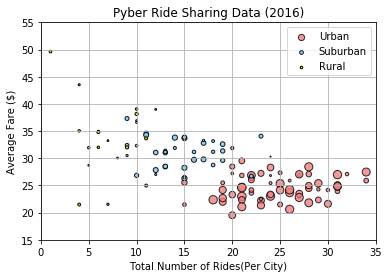

In [49]:
# Create plot
#fig = plt.figure()
fig, ax = plt.subplots()
ax.grid(True)
ax.scatter(x1, y1, alpha=0.8, marker = "o", s=driver_count1, c='lightcoral', edgecolors='black', label='Urban')
ax.scatter(x3, y3, alpha=0.9, marker = "o", s=driver_count3, c='lightskyblue', edgecolors='black', label='Suburban')
ax.scatter(x2, y2, alpha=1.0, marker = "o", s=driver_count2, c='gold', edgecolors='black', label='Rural')
# Set the upper and lower limits of our y axis
plt.ylim(15,55)
# The x limits of our scatter plot is 0 to 40
plt.xlim(0, 35)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(loc=1)
plt.show()

In [22]:
# Total Fares by City Type
total_fares = merge_df.sum()
total_fares["fare"]

64669.11999999995

In [24]:
# Total Fares by City Type-Rural
total_rural_fares=merge_df[merge_df["type"]=='Rural']
b = total_rural_fares.sum()["fare"]

In [25]:
# Total Fares by City Type-Suburban
total_sub_fares=merge_df[merge_df["type"]=='Suburban']
c = total_sub_fares.sum()["fare"]

In [26]:
# Total Fares by City Type-Urban
total_urban_fares=merge_df[merge_df["type"]=='Urban']
d = total_urban_fares.sum()["fare"]

In [27]:
# Labels for the sections of our pie chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [d, b, c]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

title = ["% Of Total Fares By City Type"]

In [28]:
# Create the pie chart based upon the values above
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)

([<matplotlib.patches.Wedge at 0x1854ae43898>,
 [Text(1.19956,0.0325437,'Urban'),
  Text(-0.630174,0.901599,'Rural'),
  Text(-1.07006,-0.254879,'Suburban')],
 [Text(0.699743,0.0189838,'62.0%'),
  Text(-0.343731,0.491781,'6.6%'),
  Text(-0.583671,-0.139025,'31.4%')])

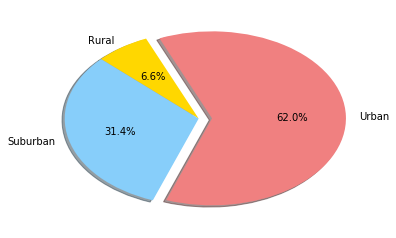

In [29]:
# Prints our pie chart to the screen
plt.show()

In [30]:
# % of Total Rides by City Type
# Total Rides by City Type
total_rides = merge_df.count()
total_rides["ride_id"]

2407

In [31]:
# Total Rides by City Type-Rural
total_rural_rides=merge_df[merge_df["type"]=='Rural']
total_rural_rides.count()["ride_id"]

125

In [32]:
# Total Rides by City Type-Suburban
total_sub_rides=merge_df[merge_df["type"]=='Suburban']
total_sub_rides.count()["ride_id"]

657

In [33]:
# Total Rides by City Type-Urban
total_urban_rides=merge_df[merge_df["type"]=='Urban']
total_urban_rides.count()["ride_id"]

1625

In [34]:
# Labels for the sections of our pie chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [1625, 125, 657]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

In [43]:
# Create the pie chart based upon the values above
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=220)
plt.title

([<matplotlib.patches.Wedge at 0x1854af389b0>,
 [Text(1.19995,0.0104091,'Urban'),
  Text(-0.91832,0.605548,'Rural'),
  Text(-1.09377,-0.116925,'Suburban')],
 [Text(0.699974,0.00607199,'78.1%'),
  Text(-0.500902,0.330299,'3.1%'),
  Text(-0.596601,-0.0637771,'18.8%')])

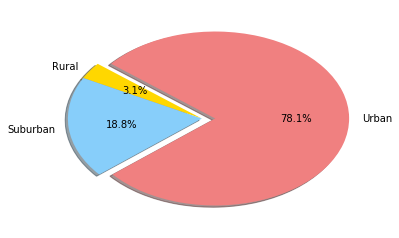

In [44]:
# Prints our pie chart to the screen
plt.show()

In [37]:
driver_count1.sum()

2607.0

In [38]:
driver_count2.sum()

104.0

In [39]:
driver_count3.sum()

629.0

In [40]:
# % of Total Drivers by City Type
# Labels for the sections of our pie chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [2607, 104, 629]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

In [41]:
# Create the pie chart based upon the values above
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=220)

([<matplotlib.patches.Wedge at 0x1854aeed2e8>,
 [Text(1.19995,0.0104091,'Urban'),
  Text(-0.91832,0.605548,'Rural'),
  Text(-1.09377,-0.116925,'Suburban')],
 [Text(0.699974,0.00607199,'78.1%'),
  Text(-0.500902,0.330299,'3.1%'),
  Text(-0.596601,-0.0637771,'18.8%')])

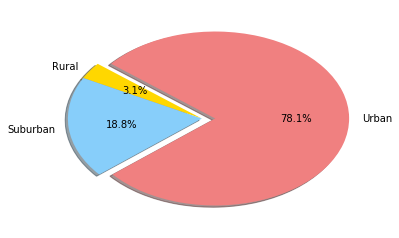

In [42]:
# Prints our pie chart to the screen
plt.show()


In [45]:
jupyter nbconvert --to markdown "Pymaceuticals_HW5.ipynb" --output "README"

SyntaxError: invalid syntax (<ipython-input-45-3cd6433ae732>, line 1)